In [748]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

prefix_url='https://graphemy.ir/datasets'
def get_file(name):
    return f'{prefix_url}/{name}'

df = pd.read_csv(get_file('FuelConsumption.csv'))
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [749]:
def normal_equation(X,Y):
    W = np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,Y))
    return W

def lr_predict(X,W):
    y = np.dot(X,W)
    return y


def closed_form_lr(X,Y):
    W = normal_equation(X,Y)
    predictions = lr_predict(X,W)
    return predictions

def mse_loss(pred,real):
    diff = pred-real
    return np.sum(diff*diff)/diff.size

In [750]:
x = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']].values
y = df['CO2EMISSIONS'].values

In [751]:
ones = np.ones((x.shape[0],1))
ones.shape

(1067, 1)

In [752]:
x_new = np.concatenate((ones,x), axis=1)
x_new.shape

(1067, 5)

In [753]:
W_final = normal_equation(x_new,y)
W = np.random.rand(5)
W, W_final

(array([0.24653036, 0.36803886, 0.9295616 , 0.79707359, 0.73167138]),
 array([66.22420043, 10.91698918,  7.20194436,  6.08093423,  3.2596791 ]))

In [754]:
prediction = lr_predict(x_new,W)
prediction

array([17.49408122, 19.40916381, 13.54297056, ..., 24.77918211,
       24.0884174 , 26.34106881])

In [755]:
mse_loss(prediction,y)

56977.27538616704

Batch Gradient Descent

In [756]:
def calc_gradient(X,error):
    gradient = np.dot(X.T,error)
    return gradient

def update_weights(W,lr,gradient):
    new_weights = W - lr * gradient
    return new_weights

def train_model_lr_gd(X,Y,W,n_epoches,lr):
    losses=[]
    for i in range(n_epoches):
        predictions = lr_predict(X,W)
        error = predictions - Y
        loss = mse_loss(predictions,Y)
        losses.append(loss)

        gradient=calc_gradient(X,error)

        W = update_weights(W,lr,gradient)

    return W,losses

In [757]:
lr = 0.00000002
n_epoches = 2000
W = np.random.rand(5)
W, losses = train_model_lr_gd(x_new,y,W,n_epoches,lr)
losses[-1]

931.3022028706861

In [758]:
W, W_final

(array([1.36763625, 3.4501343 , 5.59835742, 9.88248159, 7.87090869]),
 array([66.22420043, 10.91698918,  7.20194436,  6.08093423,  3.2596791 ]))

Text(0, 0.5, 'lr')

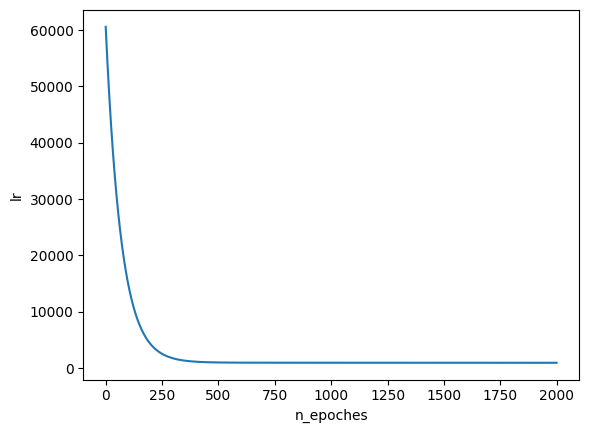

In [760]:
a = [i for i in range(n_epoches)]
b = losses

plt.plot(a[:],b[:])
plt.xlabel('n_epoches')
plt.ylabel('lr')